In [1]:
import numpy as np
import matplotlib.pyplot as plt

1. Data

In [2]:
# toy dataset- 4 points, 2 classes
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])  # binary labels

2. Parameters

In [3]:
# initialize params
np.random.seed(0)
W1 = np.random.randn(2, 3) * 0.1  # 2 -> 3 hidden
b1 = np.zeros((1,3))
W2 = np.random.randn(3, 1) * 0.1  # 3 -> 1 output
b2 = np.zeros((1,1))

3. Activations

In [4]:
def sigmoid(z): return 1/(1+np.exp(-z))
def dsigmoid(a): return a*(1-a)
def tanh(z): return np.tanh(z)
def dtanh(a): return 1-a**2

4. Training Loop

In [5]:
lr = 0.1
epochs = 5000
losses = []

for epoch in range(epochs):
    # forward
    z1 = X @ W1 + b1
    a1 = tanh(z1)
    z2 = a1 @ W2 + b2
    yhat = sigmoid(z2)

    # loss (mean squared error)
    loss = np.mean((yhat-y)**2)
    losses.append(loss)

    # backward
    dz2 = (yhat-y)*dsigmoid(yhat)
    dW2 = a1.T @ dz2
    db2 = dz2.sum(0,keepdims=True)

    dz1 = dz2 @ W2.T * dtanh(a1)
    dW1 = X.T @ dz1
    db1 = dz1.sum(0,keepdims=True)

    # update
    W1 -= lr*dW1
    b1 -= lr*db1
    W2 -= lr*dW2
    b2 -= lr*db2

    if epoch % 1000 == 0:
        print(f"epoch {epoch}, loss {loss:.4f}")

print("Predictions:", (yhat>0.5).astype(int).ravel())


epoch 0, loss 0.2499
epoch 1000, loss 0.2054
epoch 2000, loss 0.0114
epoch 3000, loss 0.0032
epoch 4000, loss 0.0018
Predictions: [0 1 1 0]


5. Plot Loss Curve

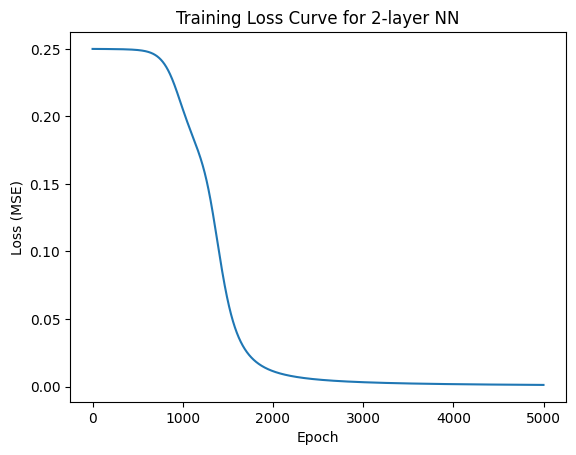

In [6]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss Curve for 2-layer NN")
plt.show()